In [12]:
# csv 파일 주소
data_csv_url = './csv_data/test_data4.csv'

# split train_ds, validation_ds, test_ds

In [13]:
import pandas as pd

In [14]:
data_pd = pd.read_csv(data_csv_url)

data_pd.head(20)

,Unnamed: 0,Sentence,Emotion
0,0,언니 동생으로 부르는게 맞는 일인가요..??,공포
1,1,그냥 내 느낌일뿐겠지?,공포
2,2,아직너무초기라서 그런거죠?,공포
3,3,유치원버스 사고 낫다던데,공포
4,4,근데 원래이런거맞나요,공포
5,5,남자친구가 떠날까봐요,공포
6,6,이거 했는데 허리가 아플수도 있나요? ;;,공포
7,7,내가불안해서꾸는걸까..,공포
8,8,일주일도 안 남았당...ㅠㅠ,공포
9,9,약은 최대한 안먹으려고 하는데좋은 음시있나요?0,공포


In [15]:
# Data 컬럼, 데이터 shape 조회
data_pd.columns, data_pd.shape

(Index(['Unnamed: 0', 'Sentence', 'Emotion'], dtype='object'), (28335, 3))

## 데이터를 무작위로 섞고, 컬럼명을 변경해준다

In [16]:
# 컬럼 명 변경
data_pd = data_pd.rename(columns={'Sentence': 'sentence', 'Emotion': 'label'})

# Unnamed 컬럼 제거
data_pd = data_pd.drop('Unnamed: 0', axis=1)

# 데이터를 무작위로 섞어준다
shuffled_data = data_pd.sample(frac=1)
shuffled_data.head(20)

,sentence,label
7290,이렇게 큰줄 처음알아서 충격먹음0,놀람
4569,어떻게 감당할지 여전히 어렵고 모르겠어요.,공포
24642,용기있는 지식인,행복
13688,국민연금 토해놓고 하야해라,분노
27286,딱 나가기 좋은날씨네,행복
10409,전 아직 안와서그애가 안쓴건지.,놀람
6380,상태가안조아도대단하다 4000원이라니,놀람
20354,남자친구랑 장거리 연애중인데ㅠㅠㅠ,슬픔
17796,저 정말 학교 생활때문에 죽고 싶을 정도로 힘 들어요.,슬픔
11480,나보다 2살 쳐 많길래 참는다,분노


In [17]:
from transformers import AutoModelForSequenceClassification
from tokenization_kobert import KoBertTokenizer

model = AutoModelForSequenceClassification.from_pretrained('monologg/distilkobert')
tokenizer = KoBertTokenizer.from_pretrained('monologg/distilkobert')

Some weights of the model checkpoint at monologg/distilkobert were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at monologg/distilkobert and are newly initialized: ['classifier.bias', 'pre_classifier.bias', 'pre_classifier.w

In [18]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [19]:
# extract labels
id2label = {}
label2id = {}

for i, label in enumerate(shuffled_data.label.unique()):
    id2label[i] = label
    label2id[label] = i

In [20]:
import torch
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, df, label2id):
        self.data = df.values
        self.label2id = label2id
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        result = self.data[idx, 0]
        result = tokenizer(result, truncation=True, return_token_type_ids=False)
        label = self.data[idx, -1]
        label = self.label2id[label]
        result['label'] = label
        
        return result

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, SubsetRandomSampler
import random

# pandas 데이터를 train, validation, test로 나눈다 (약 8:1:1 비율로 생성)
train_df, test_df = train_test_split(shuffled_data, test_size=0.1, random_state=42)
train_df, validation_df = train_test_split(train_df, test_size=0.11, random_state=42)

# Dataset 생성
train_ds, validation_ds, test_ds = CustomDataset(train_df, label2id), CustomDataset(validation_df, label2id), CustomDataset(test_df, label2id)

train_ds.__getitem__(0), validation_ds.__getitem__(0)

({'input_ids': [2, 4473, 7199, 7784, 7255, 7850, 7416, 6332, 7852, 7843, 3], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'label': 3},
 {'input_ids': [2, 5149, 7191, 5536, 2084, 5346, 6973, 6003, 5330, 5702, 54, 415, 442, 7881, 5134, 7096, 5702, 54, 3], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'label': 0})

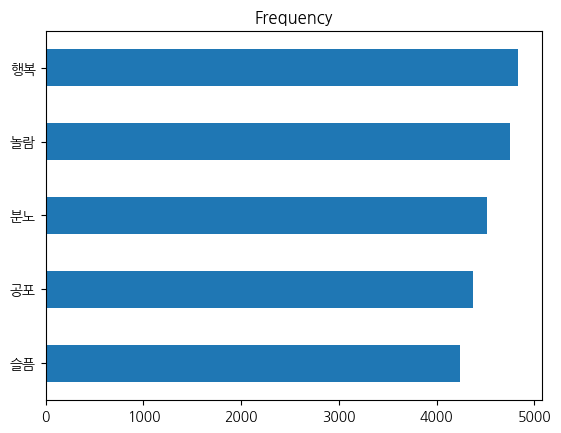

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic' # 한글 폰트 설정

train_df['label'].value_counts(ascending=True).plot.barh()
plt.title('Frequency')
plt.show()

In [23]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer, padding='longest')

2023-05-02 12:05:55.041114: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-02 12:05:55.086991: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-02 12:05:56.267147: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [24]:
# Evalate
import evaluate

accuracy = evaluate.load('accuracy')

In [25]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, labels=labels)

In [26]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained(
    "monologg/distilkobert", num_labels=len(id2label), id2label=id2label, label2id=label2id
)

Some weights of the model checkpoint at monologg/distilkobert were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at monologg/distilkobert and are newly initialized: ['classifier.bias', 'pre_classifier.bias', 'pre_classifier.w

In [27]:
model.config

DistilBertConfig {
  "_name_or_path": "monologg/distilkobert",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "\ub180\ub78c",
    "1": "\uacf5\ud3ec",
    "2": "\ud589\ubcf5",
    "3": "\ubd84\ub178",
    "4": "\uc2ac\ud514"
  },
  "initializer_range": 0.02,
  "label2id": {
    "\uacf5\ud3ec": 1,
    "\ub180\ub78c": 0,
    "\ubd84\ub178": 3,
    "\uc2ac\ud514": 4,
    "\ud589\ubcf5": 2
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 3,
  "pad_token_id": 1,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.28.1",
  "vocab_size": 8002
}

In [28]:
import numpy as np

training_args = TrainingArguments(
    output_dir="my_awesome_model",
    learning_rate=4e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=30,
    weight_decay=0.01,
    evaluation_strategy="steps",
    save_strategy="steps",
    eval_steps=1000, 
    save_steps=1000,
    save_total_limit=10,
    load_best_model_at_end=True
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=validation_ds,
#    tokenizer=tokenizer,
    data_collator=data_collator,
    # compute_metrics=compute_metrics,
)

trainer.train()

/home/elicer/.local/lib/python3.10/site-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss
1000,0.930800,0.863978
2000,0.785300,0.854507
3000,0.712000,0.857285
4000,0.664000,0.870058
5000,0.560100,0.910031
6000,0.480700,1.008818
7000,0.462800,1.004667
8000,0.373500,1.145962
9000,0.305000,1.208338
10000,0.295600,1.300254


TrainOutput(global_step=42570, training_loss=0.20142200108506406, metrics={'train_runtime': 2295.3754, 'train_samples_per_second': 296.618, 'train_steps_per_second': 18.546, 'total_flos': 3123913686065418.0, 'train_loss': 0.20142200108506406, 'epoch': 30.0})

In [29]:
import transformers

transformers.__version__

'4.28.1'

In [30]:
tokenizer("동해물과 백두산이 마르고 닳도록 하느님이 보우하사 우리나라 만세 무궁화 삼천리 화려강산 대한사람 대한으로 길이 보전하세")

{'input_ids': [2, 1741, 7848, 6241, 5468, 2298, 5907, 6516, 7096, 1907, 6113, 5439, 517, 0, 5861, 4924, 5757, 5778, 7096, 2355, 7005, 7782, 6493, 3503, 1931, 6579, 2095, 5521, 7941, 2650, 7422, 6122, 5112, 6060, 5350, 6516, 1682, 6498, 1682, 7078, 1315, 7096, 2355, 7207, 7782, 6579, 3], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [31]:
from transformers import pipeline

# 파이프라인 가져올 때 model은 사용중인 model을 주면 댐
classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

In [32]:
yhat = trainer.predict(validation_ds)
print(yhat)

PredictionOutput(predictions=array([[ 2.3723686 , -0.8756723 , -0.05394095, -0.33515573, -1.308012  ],
       [-0.7564216 ,  0.12397674, -1.5904492 , -1.1221542 ,  2.9092772 ],
       [ 0.1297454 ,  0.73933214, -0.60874206, -1.209689  ,  0.70337665],
       ...,
       [-1.8611364 ,  0.64057   ,  0.6148507 , -1.7017727 ,  2.1383014 ],
       [ 0.8340327 , -0.9753913 ,  1.92859   , -0.40689766, -1.4127704 ],
       [-0.5540884 ,  2.5634732 , -2.9094126 , -2.5207639 ,  2.3185885 ]],
      dtype=float32), label_ids=array([0, 4, 1, ..., 4, 2, 4]), metrics={'test_loss': 0.8545069098472595, 'test_runtime': 2.809, 'test_samples_per_second': 998.925, 'test_steps_per_second': 62.655})


In [33]:
predictions = yhat[0]
labels = yhat[1]
predictions = np.argmax(predictions, axis=1)

accuracy.compute(predictions=predictions, references=labels)

{'accuracy': 0.6785459729151817}

In [34]:
# 오차행렬 생성
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

In [35]:
validation_ds[1]["label"]

4

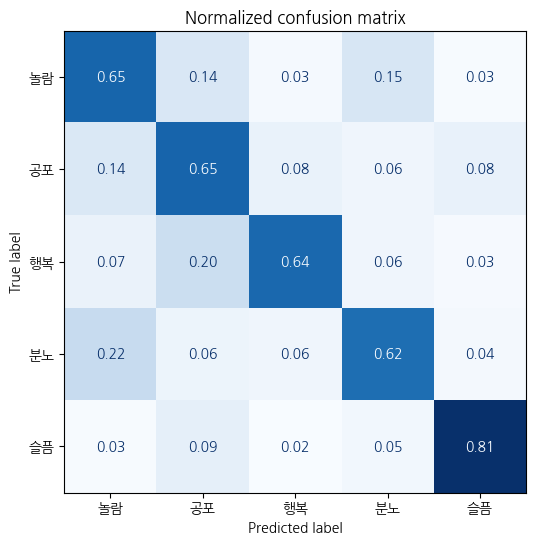

In [36]:
# 답안지
y_valid = [data["label"] for data in validation_ds]
y_valid = [id2label[label] for label in y_valid]

# 예측치
y_preds = [id2label[label] for label in predictions]

# labels
labels = label2id.keys()

plot_confusion_matrix(y_preds, y_valid, labels)